In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [10]:
train_data.shape

(13636, 15)

In [11]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train_data.drop('RecipeNumber',axis=1,inplace=True)
train_data.drop('CommentID',axis=1,inplace=True)
train_data.drop('UserReputation',axis=1,inplace=True)
train_data.drop('ReplyCount',axis=1,inplace=True)
train_data.drop('ThumbsUpCount',axis=1,inplace=True)
train_data.drop('ThumbsDownCount',axis=1,inplace=True)
train_data.drop('BestScore',axis=1,inplace=True)
train_data.drop('CreationTimestamp',axis=1,inplace=True)
train_data.drop('UserName',axis=1,inplace=True)

In [14]:
# train_data.drop('RecipeName',axis=1,inplace=True)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             13636 non-null  int64 
 1   RecipeCode     13636 non-null  int64 
 2   RecipeName     13636 non-null  object
 3   UserID         13636 non-null  object
 4   Rating         13636 non-null  int64 
 5   Recipe_Review  13634 non-null  object
dtypes: int64(3), object(3)
memory usage: 639.3+ KB


In [16]:
train_data.describe()

,ID,RecipeCode,Rating
count,13636.000000,13636.000000,13636.000000
mean,121.085289,21785.990833,4.288721
std,116.995633,23883.189918,1.544839
min,0.000000,386.000000,0.000000
25%,45.000000,6504.000000,5.000000
50%,91.000000,14600.000000,5.000000
75%,148.000000,33121.000000,5.000000
max,724.000000,191775.000000,5.000000


In [17]:
train_data.head()

,ID,RecipeCode,RecipeName,UserID,Rating,Recipe_Review
0,70,12259,Banana Bars with Cream Cheese Frosting,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,5,great recipe! I have made them just as written...
1,72,8202,Simple Taco Soup,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,5,This is an easy and quick recipe that is great...
2,458,2832,Cheeseburger Soup,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,3,I think I was looking for something extra spec...
3,7,100276,Grilled Huli Huli Chicken,u_1oKZCQcKQZdQhDVBS7oISc216VA,5,This is our favorite grilled chicken recipe. ...
4,60,19731,Cauliflower Soup,u_1oKd4sudZQPgu6YALiC7bW7mKMs,4,Great basic recipe. I added 2 teaspoons Tuscan...


In [18]:
train_data.isnull().sum()

,0
ID,0
RecipeCode,0
RecipeName,0
UserID,0
Rating,0
Recipe_Review,2


In [19]:
train_data.dropna(subset=['ID','RecipeCode','RecipeName','UserID','Recipe_Review', 'Rating'], inplace=True)

In [20]:
train_data.isnull().sum()

,0
ID,0
RecipeCode,0
RecipeName,0
UserID,0
Rating,0
Recipe_Review,0


In [21]:
train_data['Rating'].value_counts()

,count
Rating,
5,10369
0,1272
4,1241
3,368
1,210
2,174


In [23]:
test_data = pd.read_csv('/content/test.csv')

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [25]:
test_data.drop('RecipeNumber',axis=1,inplace=True)
test_data.drop('CommentID',axis=1,inplace=True)
test_data.drop('UserName',axis=1,inplace=True)
test_data.drop('UserReputation',axis=1,inplace=True)
test_data.drop('CreationTimestamp',axis=1,inplace=True)
test_data.drop('ReplyCount',axis=1,inplace=True)
test_data.drop('ThumbsUpCount',axis=1,inplace=True)
test_data.drop('ThumbsDownCount',axis=1,inplace=True)
test_data.drop('BestScore',axis=1,inplace=True)

In [26]:
# test_data.drop('RecipeName',axis=1,inplace=True)

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4546 non-null   int64 
 1   RecipeCode     4546 non-null   int64 
 2   RecipeName     4546 non-null   object
 3   UserID         4546 non-null   object
 4   Recipe_Review  4546 non-null   object
dtypes: int64(2), object(3)
memory usage: 177.7+ KB


In [28]:
test_data.isnull().sum()

,0
ID,0
RecipeCode,0
RecipeName,0
UserID,0
Recipe_Review,0


In [29]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
cat_cols = train_data.select_dtypes(include='object').columns
print(cat_cols)

Index(['RecipeName', 'UserID', 'Recipe_Review'], dtype='object')


In [31]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['ID', 'RecipeCode', 'Rating'], dtype='object')


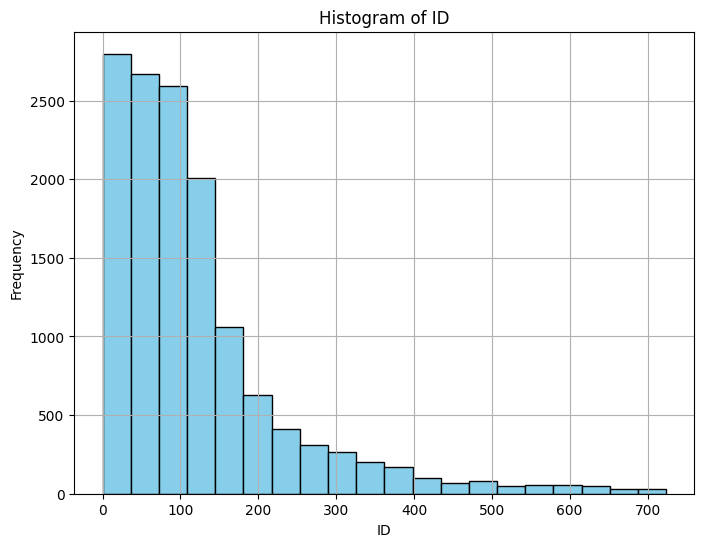

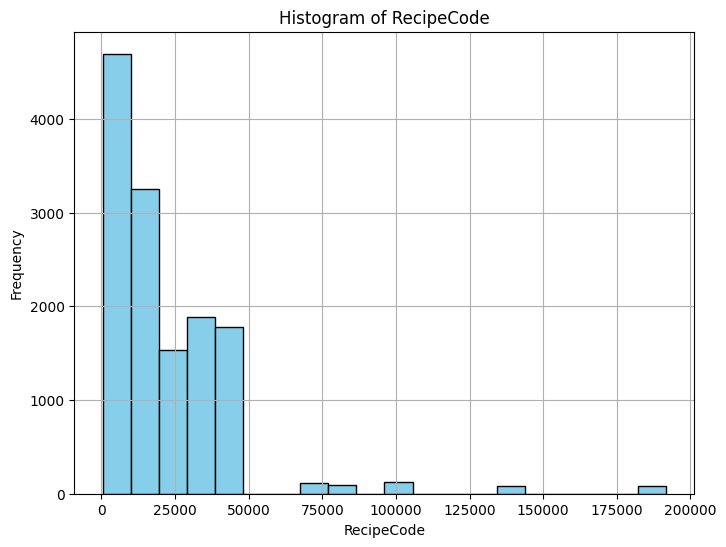

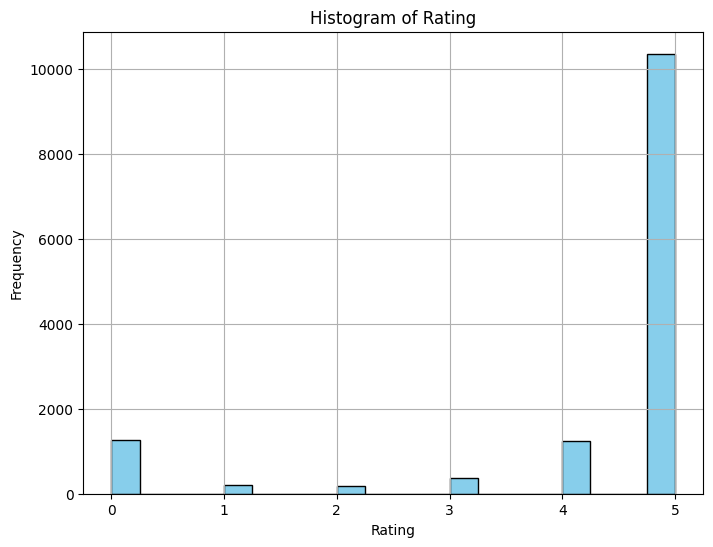

In [32]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(train_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

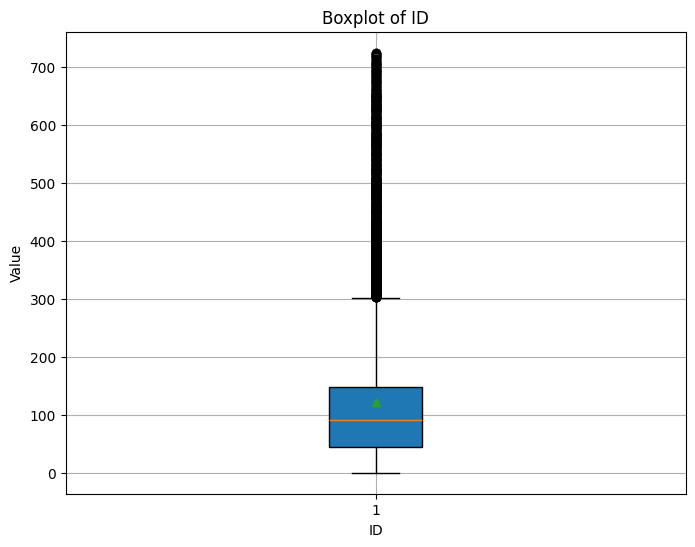

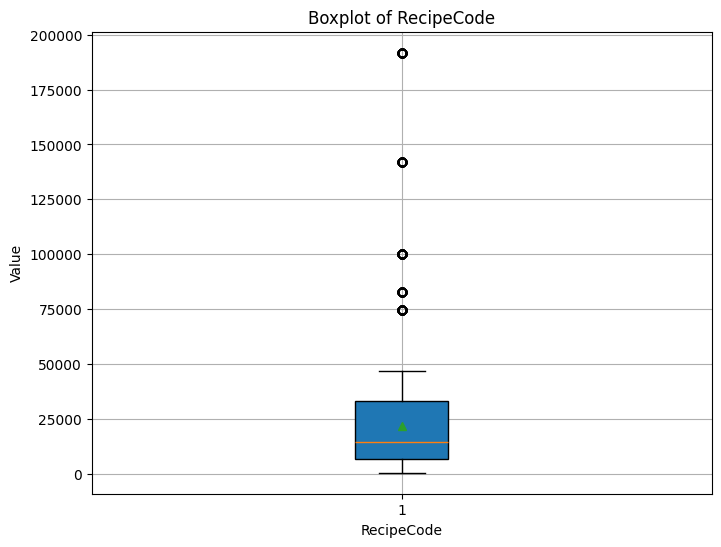

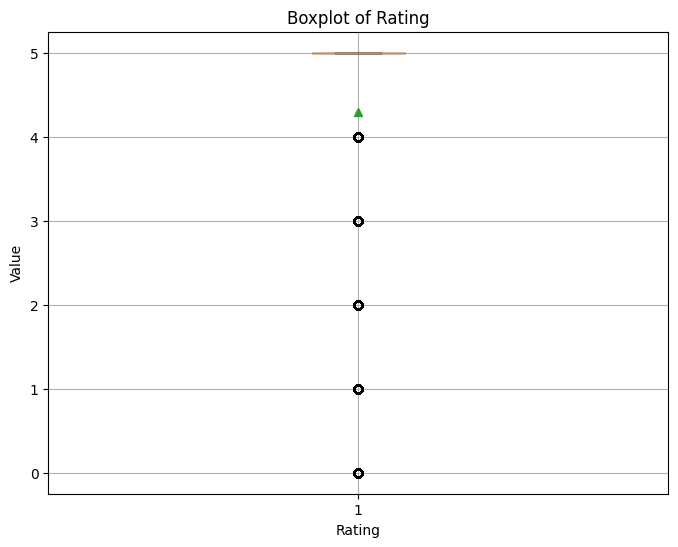

In [33]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(train_data[col], patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'RecipeCode'}>],
       [<Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

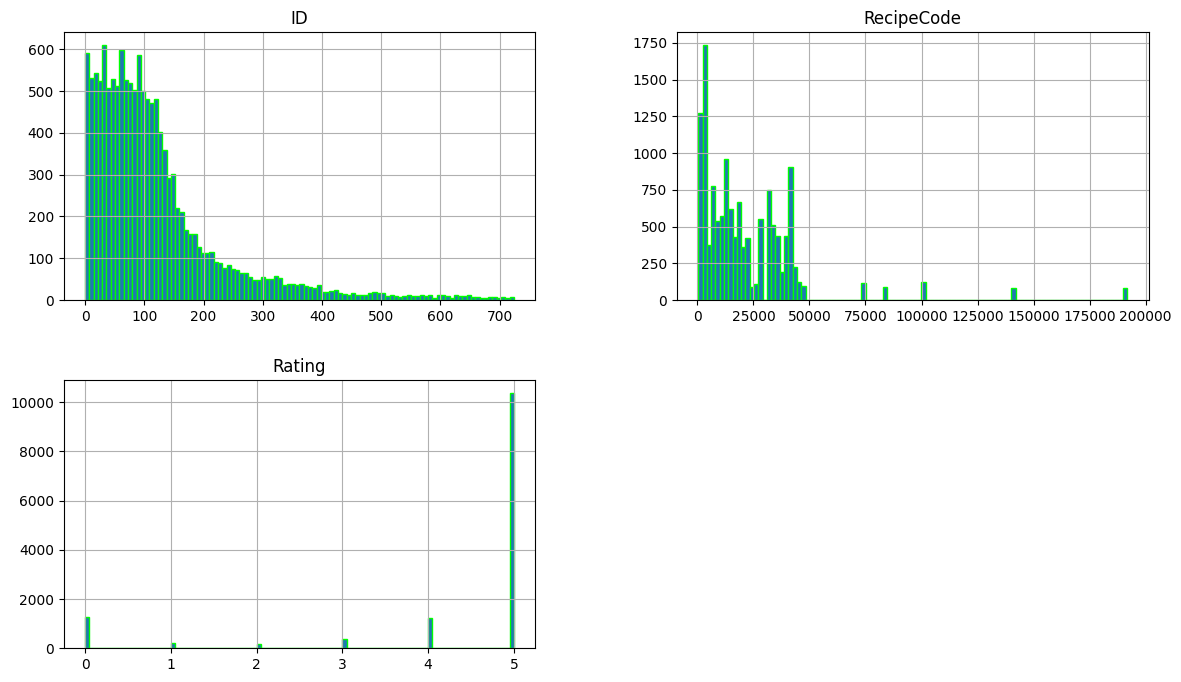

In [34]:
train_data.hist(bins = 100, edgecolor = 'lime', figsize=(14,8))

In [35]:
y = train_data['Rating']

In [36]:
train_data.drop(columns=['Rating'], inplace=True)

In [37]:
num_cols = num_cols.drop('Rating')

In [38]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

train_data_processed = pipeline.fit_transform(train_data)

In [39]:
test_data_processed = pipeline.transform(test_data)

In [40]:
correlation = train_data['ID'].corr(y)
print("Correlation between ID and Rating:", correlation)
correlation = train_data['RecipeCode'].corr(y)
print("Correlation between RecipeCode and Rating:", correlation)

# correlation = train_data['RecipeName'].corr(y)
# print("Correlation between RecipeName and Rating:", correlation)
# correlation = train_data['UserID'].corr(y)
# print("Correlation between UserID and Rating:", correlation)
# correlation = train_data['Recipe_Review'].corr(y)
# print("Correlation between Recipe_Review and Rating:", correlation)

Correlation between ID and Rating: 0.04956845116371135
Correlation between RecipeCode and Rating: -0.02068711183196835


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
X = train_data_processed

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the model's performance on the validation set
# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Predict ratings on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation set:", accuracy)

In [ ]:
print(best_rf_classifier)

In [ ]:
y_pred_test_rf = best_rf_classifier.predict(test_data_processed)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=1000))

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Define the number of folds for cross-validation
num_folds = [5, 10, 15]

for folds in num_folds:
    print(f"\nNumber of Folds: {folds}\n")

    # Perform cross-validation with hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=folds, shuffle=True, random_state=42), verbose=2, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_logistic_regression = grid_search.best_estimator_

    # Predict ratings on the validation set
    y_pred_val = best_logistic_regression.predict(X_val)

    # Print the best hyperparameters
    print("Best hyperparameters:", grid_search.best_params_)

    # Print the accuracy score
    accuracy = accuracy_score(y_val, y_pred_val)
    print("Accuracy:", accuracy)

In [ ]:
# Predict ratings on the test set
y_pred_test_lr = best_logistic_regression.predict(test_data_processed)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Different values of cross-validation
cv_values = [5, 10, 15]

for cv in cv_values:
    print(f"\nNumber of Folds: {cv}\n")

    # Perform grid search with cross-validation
    grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

    # Fit the grid search to the data
    grid_search_knn.fit(X_train, y_train)

    # Get the best KNN model
    best_knn_model = grid_search_knn.best_estimator_

    # Print the best hyperparameters
    print("Best hyperparameters for KNN:", grid_search_knn.best_params_)

    # Predict ratings on the validation set
    y_pred_val_knn = best_knn_model.predict(X_val)

    # Calculate accuracy
    accuracy_knn = accuracy_score(y_val, y_pred_val_knn)
    print("Accuracy for KNN:", accuracy_knn)

In [ ]:
# Predict ratings on the test set
y_pred_test_knn = best_knn_model.predict(test_data_processed)

In [ ]:
from sklearn.svm import SVC

# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Different values of cross-validation
cv_values = [5, 10, 15]

for cv in cv_values:
    print(f"\nNumber of Folds: {cv}\n")

    # Perform grid search with cross-validation
    grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

    # Fit the grid search to the data
    grid_search_svm.fit(X_train, y_train)

    # Get the best SVM model
    best_svm_model = grid_search_svm.best_estimator_

    # Print the best hyperparameters
    print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

    # Predict ratings on the validation set
    y_pred_val_svm = best_svm_model.predict(X_val)

    # Calculate accuracy
    accuracy_svm = accuracy_score(y_val, y_pred_val_svm)
    print("Accuracy for SVM:", accuracy_svm)

In [ ]:
# Predict ratings on the test set
y_pred_test_svm = best_svm_model.predict(test_data_processed)

In [ ]:
# Define the number of folds for cross-validation
num_folds = [4, 8, 12, 15]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the number of folds for cross-validation
num_folds = [4, 8, 12, 15]

for folds in num_folds:
    print(f"\nNumber of Folds: {folds}\n")

    # Perform cross-validation with hyperparameter tuning
    grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=folds, verbose=2, scoring='accuracy')

    # Fit the model
    grid_search_dt.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_dt_classifier = grid_search_dt.best_estimator_

    # Predict ratings on the validation set
    y_pred_val_dt = best_dt_classifier.predict(X_val)

    # Print the best hyperparameters
    print("Best hyperparameters:", grid_search_dt.best_params_)

    # Print the accuracy score
    accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
    print("Accuracy:", accuracy_dt)

In [ ]:
# Predict ratings on the test set
y_pred_test_dt = best_dt_classifier.predict(test_data_processed)

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Define the base classifier for Bagging
base_classifier = DecisionTreeClassifier()

# Define the Bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier)

# Define the parameter grid
param_grid_bagging = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

for folds in num_folds:
    print(f"\nNumber of Folds: {folds}\n")

    # Perform cross-validation with hyperparameter tuning
    grid_search_bagging = GridSearchCV(bagging_classifier, param_grid_bagging, cv=folds, verbose=2, scoring='accuracy')

    # Fit the model
    grid_search_bagging.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_bagging_classifier = grid_search_bagging.best_estimator_

    # Predict ratings on the validation set
    y_pred_val_bagging = best_bagging_classifier.predict(X_val)

    # Print the best hyperparameters
    print("Best hyperparameters:", grid_search_bagging.best_params_)

    # Print the accuracy score
    accuracy_bagging = accuracy_score(y_val, y_pred_val_bagging)
    print("Accuracy:", accuracy_bagging)

In [ ]:
# Predict ratings on the test set
y_pred_test_bagging = best_bagging_classifier.predict(test_data_processed)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier
mlp_classifier = MLPClassifier()

# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

for folds in num_folds:
    print(f"\nNumber of Folds: {folds}\n")

    # Perform cross-validation with hyperparameter tuning
    grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=folds, verbose=2, scoring='accuracy')

    # Fit the model
    grid_search_mlp.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_mlp_classifier = grid_search_mlp.best_estimator_

    # Predict ratings on the validation set
    y_pred_val_mlp = best_mlp_classifier.predict(X_val)

    # Print the best hyperparameters
    print("Best hyperparameters:", grid_search_mlp.best_params_)

    # Print the accuracy score
    accuracy_mlp = accuracy_score(y_val, y_pred_val_mlp)
    print("Accuracy:", accuracy_mlp)

In [ ]:
# Predict ratings on the test set
y_pred_test_mlp = best_mlp_classifier.predict(test_data_processed)

In [ ]:
# Models and their accuracy scores
# RandomForestClassifier Model - 0.77298
# LogisticRegression Model - 0.76748
# KNN Model - 0.76088
# SVM Model - 0.76638
# DecisionTree Model - 0.76440
# RandomForestClassifier Model (without RecipeName column) - 0.76880

In [ ]:
submission = pd.DataFrame(columns=["ID", "Rating"])
submission["ID"] = [i for i in range(1,len(y_pred_test_rf)+1)]
submission["Rating"] = y_pred_test_rf

# Save the submission file
submission.to_csv('submission.csv', index=False)